In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Генерация тестовых данных
np.random.seed(42)
X = np.random.randint(0, 2, size=(100, 12))  # 100 примеров, 12 бинарных признаков
#Y = np.random.randint(0, 2, size=(100, 2))  # 100 примеров, 2 класса (one-hot encoding)

y_labels = np.random.randint(0, 2, size=(100,))  # 100 меток
# 3. Преобразуем в one-hot
Y = np.eye(2)[y_labels]  # (100, 2)

#print("Уникальные строки в Y:", np.unique(Y, axis=0))

# Сохранение данных в файлы
np.savetxt('dataIn.txt', X, fmt='%d')
np.savetxt('dataOut.txt', Y, fmt='%d')

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X_tr_ml, X_test_ml, y_tr_ml, y_test_ml = train_test_split(X, y_labels, test_size = 0.4, random_state = 63)
# Логистическая регрессия
lr = LogisticRegression()
lr.fit(X_tr_ml, y_tr_ml)
y_pred_lr = lr.predict(X_test_ml)
print("Logistic Regression Accuracy:", accuracy_score(y_test_ml, y_pred_lr))


# Случайный лес
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_tr_ml, y_tr_ml)
y_pred_rf = rf.predict(X_test_ml)
print("Random Forest Accuracy:", accuracy_score(y_test_ml, y_pred_rf))

Logistic Regression Accuracy: 0.4
Random Forest Accuracy: 0.4


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 52)
for i in range(5):
    print(X_train[i], "|", y_train[i])

[0 1 0 0 0 0 1 1 0 1 0 1] | [0. 1.]
[1 0 0 0 0 1 0 0 0 0 0 1] | [0. 1.]
[0 0 1 0 1 1 1 0 1 0 1 1] | [0. 1.]
[0 1 0 1 0 0 1 0 0 0 0 0] | [1. 0.]
[0 1 1 1 1 0 1 1 1 0 1 0] | [0. 1.]


In [11]:
model = keras.Sequential([
    keras.layers.Dense(16, activation = "relu", input_shape = (12,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation = "log_sigmoid"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation = "softmax")
])
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

C:\Users\steps\Projects\BSU-AI\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))
# 1. Получаем предсказания (вероятности для двух классов)
y_pred_probs = model.predict(X_test)  # форма: (N_test, 2)

# 2. Преобразуем вероятности в метки (0 или 1)
y_pred_labels = np.argmax(y_pred_probs, axis=1)  # берем класс с max вероятностью
# Результат: [0, 1, 0, 1, ...] где 0 = правящая, 1 = оппозиция

# 3. Преобразуем y_test из one-hot в метки
y_true_labels = np.argmax(y_test, axis=1)

# 4. Считаем accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4667 - loss: 0.7459 - val_accuracy: 0.4500 - val_loss: 0.6968
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5500 - loss: 0.6780 - val_accuracy: 0.4250 - val_loss: 0.6967
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4667 - loss: 0.7330 - val_accuracy: 0.4250 - val_loss: 0.6965
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5167 - loss: 0.7436 - val_accuracy: 0.4500 - val_loss: 0.6960
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5500 - loss: 0.7078 - val_accuracy: 0.4750 - val_loss: 0.6957
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5833 - loss: 0.6734 - val_accuracy: 0.4500 - val_loss: 0.6958
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5500 - loss: 0.7125 - val_accuracy: 0.4500 - val_loss: 0.6962
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4167 - loss: 0.7709 - val_accuracy: 0.4500 - val_loss: 0.6966


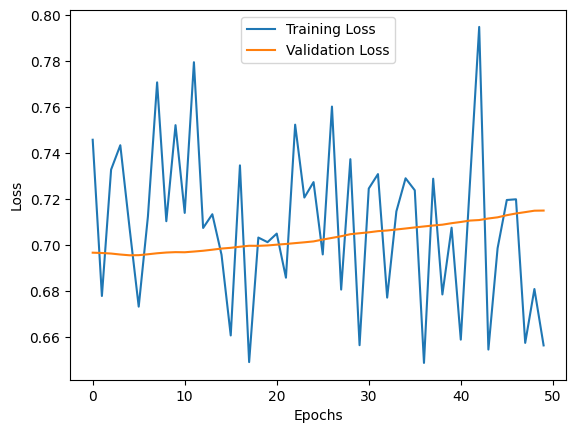

In [16]:
# График изменения функции ошибки
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Final Train Loss: {final_train_loss:.4f}")
print(f"Final Val Loss:   {final_val_loss:.4f}")
print(f"Difference:       {abs(final_train_loss - final_val_loss):.4f}")
# Найти эпоху с минимальной val_loss
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = history.history['val_loss'][best_epoch-1]
print(f"Best validation loss: {best_val_loss:.4f} at epoch {best_epoch}")
# Проверка: val_loss растет, а train_loss снижается
if history.history['val_loss'][-1] > history.history['val_loss'][-10]:
    print("ВНИМАНИЕ: Возможно переобучение!")

Final Train Loss: 0.6565
Final Val Loss:   0.7152
Difference:       0.0586
Best validation loss: 0.6957 at epoch 5
ВНИМАНИЕ: Возможно переобучение!
